Importamos fastai para datos tabulares

In [1]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.metrics import f1_score
import fastai.tabular.all as ft

Copiamos datos del Drive.

In [2]:
!cp /content/drive/MyDrive/camda2023/mifaser/* .

# Intento 1: QuantileTransformer, parámetros por defecto

Cargamos los datos, normalizamos con `QuantileTransformer` por recomendación y agregamos columna de ciudad que funcionará como etiqueta.

In [14]:
data = pd.read_csv("mifaser-table.tsv", delimiter="\t", index_col=0).T
data[:] = QuantileTransformer(n_quantiles=50, random_state=42).fit_transform(data)
data["city"] = data.index.str[23:26]
data

,1.1.1.1,1.1.1.2,1.1.1.6,1.1.1.18,1.1.1.22,1.1.1.23,1.1.1.25,1.1.1.27,1.1.1.28,1.1.1.30,...,3.1.3.78,3.2.1.178,4.2.3.90,2.3.1.136,1.14.21.9,1.4.1.21,4.2.3.7,4.1.3.40,1.14.11.36,city
CAMDA23_MetaSUB_gCSD16_AKL_1,0.654893,0.466495,0.903628,0.981584,0.666945,0.421529,0.529252,0.631293,0.540816,0.799470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_10,0.557604,0.792245,0.852814,0.684524,0.591837,0.704319,0.596166,0.589286,0.822449,0.676292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_11,0.040816,0.729182,0.772332,0.857143,0.869316,0.504234,0.312925,0.661886,0.000000,0.610013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_12,0.585034,0.553719,0.789067,0.142857,0.736077,0.437500,0.252834,0.714286,0.000000,0.645138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_13,0.622801,0.823213,0.428571,0.056689,0.892506,0.620567,0.040816,0.020408,0.000000,0.863354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.734694,0.714465,0.622449,0.729592,0.733432,0.791990,0.435374,0.797930,0.663265,0.742401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.805272,0.709716,0.712018,0.791667,0.678519,0.722433,0.604824,0.774387,0.540816,0.712466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.512605,0.576459,0.717033,0.510204,0.386827,0.409457,0.666143,0.428571,0.795918,0.357653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_8,0.596038,0.497315,0.649137,0.428571,0.502976,0.527122,0.519728,0.694581,0.928428,0.432653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH


Creamos el dataloader.

In [15]:
dls = ft.TabularDataLoaders.from_df(
    df=data,
    cont_names=list(data.columns[:-1]),
    y_names=["city"],
    bs=64
)

Creamos el `learner` de fastai.

In [16]:
learner = ft.tabular_learner(dls, metrics=ft.accuracy)

Entrenamos la red.

In [17]:
learner.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.960251,2.770528,0.123288,00:00
1,2.694417,2.682198,0.164384,00:00
2,2.421588,2.477905,0.356164,00:00
3,2.177617,2.276731,0.452055,00:00
4,1.948366,2.074826,0.506849,00:00
5,1.742643,1.846668,0.602740,00:00
6,1.561921,1.640895,0.657534,00:00
7,1.399850,1.543167,0.684932,00:00
8,1.258366,1.389662,0.698630,00:00
9,1.136123,1.290573,0.684932,00:00


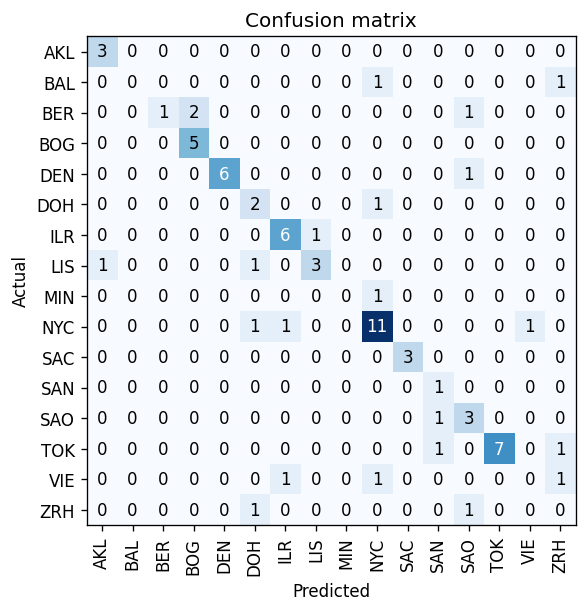

In [18]:
interp = ft.ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

# Intento 2: MinMaxScaler, parámetros por defecto

Repetiremos el intento 1 pero con MinMaxScaler

In [ ]:
data = pd.read_csv("mifaser-table.tsv", delimiter="\t", index_col=0).T
data[:] = MinMaxScaler().fit_transform(data)
data["city"] = data.index.str[23:26]
data

,1.1.1.1,1.1.1.2,1.1.1.6,1.1.1.18,1.1.1.22,1.1.1.23,1.1.1.25,1.1.1.27,1.1.1.28,1.1.1.30,...,3.1.3.78,3.2.1.178,4.2.3.90,2.3.1.136,1.14.21.9,1.4.1.21,4.2.3.7,4.1.3.40,1.14.11.36,city
CAMDA23_MetaSUB_gCSD16_AKL_1,0.056000,0.007818,0.015882,0.210191,0.019612,0.016889,0.004063,0.018348,0.002195,0.050164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_10,0.042667,0.033269,0.011221,0.022691,0.015502,0.040624,0.005342,0.015893,0.014270,0.029934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_11,0.002000,0.024322,0.006929,0.042994,0.049560,0.022231,0.002257,0.019867,0.000000,0.024194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_12,0.046000,0.010221,0.007910,0.001592,0.025602,0.017642,0.001881,0.024892,0.000000,0.027474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_13,0.051333,0.041781,0.001165,0.000398,0.061186,0.032763,0.000301,0.000234,0.000000,0.065610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AKL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.072000,0.021947,0.002330,0.025876,0.025367,0.055407,0.003311,0.039383,0.004391,0.039366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.108000,0.021253,0.003986,0.031449,0.020669,0.043257,0.005492,0.034007,0.002195,0.034308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.038000,0.010945,0.004108,0.014331,0.008691,0.016438,0.008201,0.008414,0.009879,0.012165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_8,0.047333,0.008484,0.002637,0.011545,0.012096,0.023660,0.003988,0.023490,0.043908,0.014625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH


In [ ]:
dls = ft.TabularDataLoaders.from_df(
    df=data,
    cont_names=list(data.columns[:-1]),
    y_names=["city"],
    bs=64,
    splits=ft.RandomSplitter(seed=0)
)

In [ ]:
learner = ft.tabular_learner(dls, metrics=ft.accuracy)

In [ ]:
learner.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.804422,2.756666,0.123288,00:00
1,2.610069,2.710932,0.191781,00:00
2,2.416065,2.652577,0.287671,00:00
3,2.248868,2.572245,0.246575,00:00
4,2.088513,2.502091,0.260274,00:00
5,1.943685,2.461630,0.273973,00:00
6,1.813206,2.408737,0.287671,00:00
7,1.698306,2.367914,0.328767,00:00
8,1.590972,2.301587,0.342466,00:00
9,1.487081,2.098075,0.397260,00:00


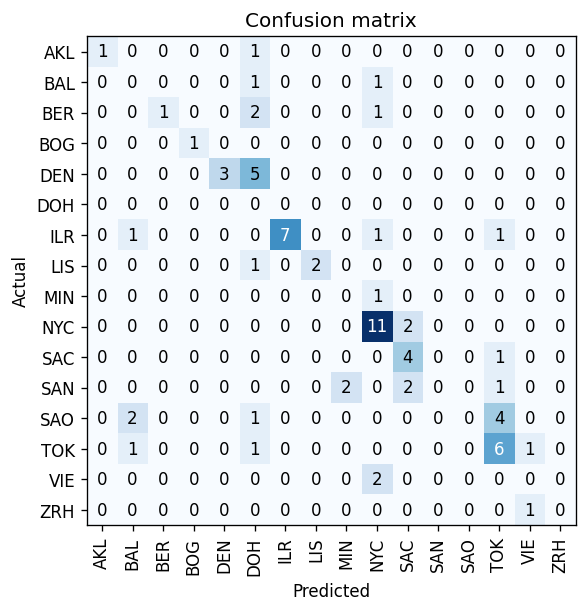

In [ ]:
interp = ft.ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

# Intento 3: QuantileTransformer con columna de año

El MinMaxScaler no dio buenos resultados, agregaremos columna de año.

In [6]:
data = pd.read_csv("mifaser-table.tsv", delimiter="\t", index_col=0).T
data[:] = QuantileTransformer(n_quantiles=50, random_state=42).fit_transform(data)
data["year"] = data.index.str[20:22]
data["city"] = data.index.str[23:26]
data

,1.1.1.1,1.1.1.2,1.1.1.6,1.1.1.18,1.1.1.22,1.1.1.23,1.1.1.25,1.1.1.27,1.1.1.28,1.1.1.30,...,3.2.1.178,4.2.3.90,2.3.1.136,1.14.21.9,1.4.1.21,4.2.3.7,4.1.3.40,1.14.11.36,year,city
CAMDA23_MetaSUB_gCSD16_AKL_1,0.654893,0.466495,0.903628,0.981584,0.666945,0.421529,0.529252,0.631293,0.540816,0.799470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,AKL
CAMDA23_MetaSUB_gCSD16_AKL_10,0.557604,0.792245,0.852814,0.684524,0.591837,0.704319,0.596166,0.589286,0.822449,0.676292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,AKL
CAMDA23_MetaSUB_gCSD16_AKL_11,0.040816,0.729182,0.772332,0.857143,0.869316,0.504234,0.312925,0.661886,0.000000,0.610013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,AKL
CAMDA23_MetaSUB_gCSD16_AKL_12,0.585034,0.553719,0.789067,0.142857,0.736077,0.437500,0.252834,0.714286,0.000000,0.645138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,AKL
CAMDA23_MetaSUB_gCSD16_AKL_13,0.622801,0.823213,0.428571,0.056689,0.892506,0.620567,0.040816,0.020408,0.000000,0.863354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,AKL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.734694,0.714465,0.622449,0.729592,0.733432,0.791990,0.435374,0.797930,0.663265,0.742401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.805272,0.709716,0.712018,0.791667,0.678519,0.722433,0.604824,0.774387,0.540816,0.712466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.512605,0.576459,0.717033,0.510204,0.386827,0.409457,0.666143,0.428571,0.795918,0.357653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_8,0.596038,0.497315,0.649137,0.428571,0.502976,0.527122,0.519728,0.694581,0.928428,0.432653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,ZRH


In [ ]:
dls = ft.TabularDataLoaders.from_df(
    df=data,
    procs=[ft.Categorify],
    cont_names=list(data.columns[:-2]),
    cat_names=["year"],
    y_names=["city"],
    bs=64,
    splits=ft.RandomSplitter(seed=0)
)
dls.show_batch()

In [ ]:
learner = ft.tabular_learner(dls, metrics=ft.accuracy)

In [ ]:
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.877546,2.758124,0.136986,00:00
1,2.640504,2.672111,0.150685,00:00
2,2.397788,2.524781,0.356164,00:00
3,2.180208,2.299093,0.506849,00:00
4,1.977502,2.061914,0.602740,00:00
5,1.784663,1.886033,0.616438,00:00
6,1.614754,1.747195,0.671233,00:00
7,1.453736,1.529229,0.657534,00:00
8,1.308180,1.374288,0.671233,00:00
9,1.179992,1.298349,0.712329,00:00


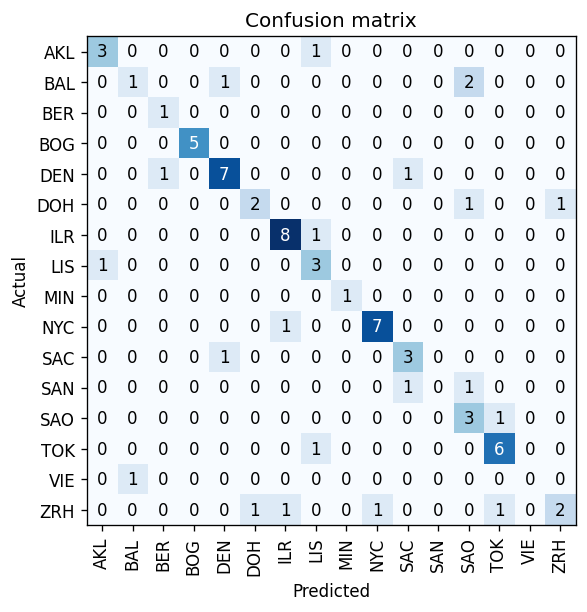

In [ ]:
interp = ft.ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

# Intento 4: Entrenar para cada año independientemente

Obtener columna de año y dividir tabla en dos.

In [5]:
data = pd.read_csv("mifaser-table.tsv", delimiter="\t", index_col=0).T
data["year"] = data.index.str[20:22].astype(float)

In [6]:
data16 = data[data["year"] == 16].drop("year", axis=1)
data16[:] = QuantileTransformer(n_quantiles=50, random_state=42).fit_transform(data16)
data16["city"] = data16.index.str[23:26]
data16

,1.1.1.1,1.1.1.2,1.1.1.6,1.1.1.18,1.1.1.22,1.1.1.23,1.1.1.25,1.1.1.27,1.1.1.28,1.1.1.30,...,3.1.3.78,3.2.1.178,4.2.3.90,2.3.1.136,1.14.21.9,1.4.1.21,4.2.3.7,4.1.3.40,1.14.11.36,city
CAMDA23_MetaSUB_gCSD16_AKL_1,0.511482,0.280268,0.804579,0.980884,0.467607,0.314733,0.339416,0.493756,0.418367,0.646829,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_10,0.408163,0.584998,0.701465,0.565306,0.403061,0.492492,0.358466,0.474305,0.640000,0.531242,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_11,0.091837,0.485962,0.561139,0.747097,0.736450,0.363588,0.198020,0.508681,0.000000,0.472904,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_12,0.428571,0.327571,0.587940,0.204082,0.555010,0.327499,0.161039,0.549571,0.000000,0.508611,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,AKL
CAMDA23_MetaSUB_gCSD16_AKL_13,0.477981,0.637810,0.311970,0.081633,0.774390,0.422170,0.020408,0.040816,0.000000,0.747336,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,AKL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD16_TOK_5,0.219762,0.312255,0.527350,0.306122,0.244002,0.306619,0.460388,0.254616,0.510204,0.317572,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,TOK
CAMDA23_MetaSUB_gCSD16_TOK_6,0.387073,0.427436,0.508065,0.613333,0.409883,0.548755,0.525899,0.660007,0.942153,0.496599,...,0.000000,0.0,0.938776,0.0,0.0,0.0,0.0,0.989796,0.0,TOK
CAMDA23_MetaSUB_gCSD16_TOK_7,0.649133,0.593067,0.775414,0.653333,0.690992,0.637719,0.681347,0.704772,0.571429,0.693878,...,0.961538,0.0,0.989796,0.0,0.0,0.0,0.0,0.000000,0.0,TOK
CAMDA23_MetaSUB_gCSD16_TOK_8,0.745986,0.746975,0.930082,0.772638,0.767250,0.774601,0.828866,0.828174,0.894229,0.831437,...,0.000000,0.0,0.938776,0.0,0.0,0.0,0.0,1.000000,0.0,TOK


In [7]:
data17 = data[data["year"] == 17].drop("year", axis=1)
data17[:] = QuantileTransformer(n_quantiles=50, random_state=42).fit_transform(data17)
data17["city"] = data17.index.str[23:26]
data17

,1.1.1.1,1.1.1.2,1.1.1.6,1.1.1.18,1.1.1.22,1.1.1.23,1.1.1.25,1.1.1.27,1.1.1.28,1.1.1.30,...,3.1.3.78,3.2.1.178,4.2.3.90,2.3.1.136,1.14.21.9,1.4.1.21,4.2.3.7,4.1.3.40,1.14.11.36,city
CAMDA23_MetaSUB_gCSD17_BAL_1,0.428571,0.436237,0.775510,0.295918,0.448980,0.499332,0.758686,0.706845,0.744898,0.185563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BAL
CAMDA23_MetaSUB_gCSD17_BAL_10,0.285714,0.242453,0.551020,0.183673,0.138322,0.276786,0.370806,0.360272,0.938776,0.087570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BAL
CAMDA23_MetaSUB_gCSD17_BAL_11,0.285714,0.145408,0.255102,0.229746,0.122449,0.220737,0.204082,0.219466,0.000000,0.227507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BAL
CAMDA23_MetaSUB_gCSD17_BAL_12,0.500000,0.409722,0.868908,0.571429,0.587228,0.531820,0.836735,0.613946,0.530612,0.597222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL
CAMDA23_MetaSUB_gCSD17_BAL_14,0.306122,0.347432,0.387755,0.204082,0.311974,0.335257,0.255102,0.381152,0.000000,0.468817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.877551,0.940349,0.821053,0.851064,0.901627,0.967578,0.557823,0.962611,0.806122,0.880368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.952356,0.936033,0.919957,0.902575,0.857983,0.911984,0.836735,0.940962,0.653061,0.851181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.632653,0.795563,0.926187,0.534884,0.466221,0.503847,0.920304,0.471810,0.959184,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH
CAMDA23_MetaSUB_gCSD17_ZRH_8,0.734694,0.691327,0.857143,0.428571,0.652733,0.667396,0.683673,0.839286,0.986037,0.510204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRH


In [8]:
dls16 = ft.TabularDataLoaders.from_df(
    df=data16,
    cont_names=list(data16.columns[:-1]),
    y_names=["city"],
    bs=64
)
dls17 = ft.TabularDataLoaders.from_df(
    df=data17,
    cont_names=list(data17.columns[:-1]),
    y_names=["city"],
    bs=64
)

In [9]:
learner16 = ft.tabular_learner(dls16, metrics=ft.accuracy)
learner17 = ft.tabular_learner(dls17, metrics=ft.accuracy)

In [10]:
learner16.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.448027,2.286885,0.147059,00:02
1,2.217742,2.244837,0.235294,00:00
2,1.929207,2.167513,0.352941,00:00
3,1.679520,2.054818,0.441176,00:00
4,1.484203,1.900772,0.558824,00:00
5,1.319705,1.751855,0.764706,00:00
6,1.180978,1.594528,0.823529,00:00
7,1.068236,1.443710,0.823529,00:00
8,0.968459,1.298145,0.911765,00:00
9,0.887222,1.162054,0.941176,00:00


In [11]:
learner17.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.461971,2.389619,0.026316,00:00
1,2.332494,2.353918,0.210526,00:00
2,2.123196,2.300501,0.289474,00:00
3,1.896984,2.223404,0.473684,00:00
4,1.694507,2.149232,0.421053,00:00
5,1.524324,2.096287,0.447368,00:00
6,1.375904,2.013780,0.473684,00:00
7,1.247777,1.937823,0.500000,00:00
8,1.135943,1.860035,0.447368,00:00
9,1.040127,1.783797,0.500000,00:00


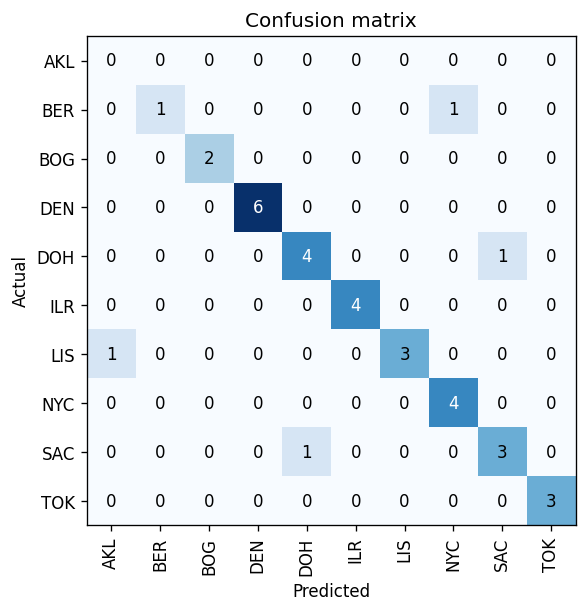

In [12]:
interp16 = ft.ClassificationInterpretation.from_learner(learner16)
interp16.plot_confusion_matrix(figsize=(5,5), dpi=120)

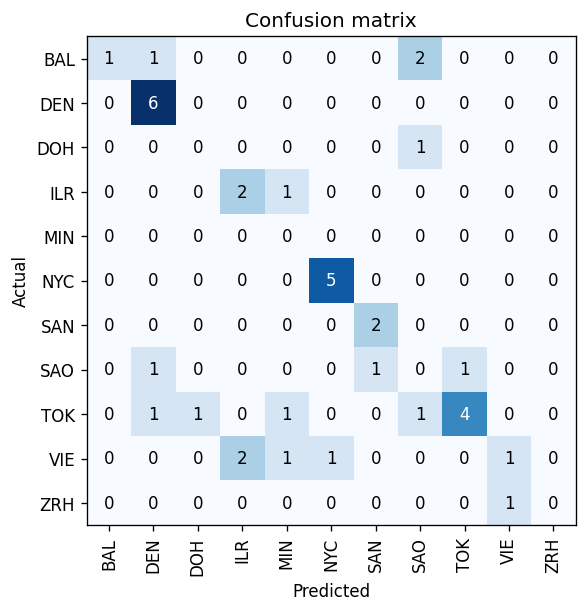

In [13]:
interp17 = ft.ClassificationInterpretation.from_learner(learner17)
interp17.plot_confusion_matrix(figsize=(5,5), dpi=120)

# Intento 5: Entrenamiento por nivel

In [24]:
learners = []
for i in range(1, 5):
    data = pd.read_csv(f"level{i}.csv", index_col=0).drop("City", axis=1)
    data[:] = QuantileTransformer(n_quantiles=50, random_state=42).fit_transform(data)
    data["year"] = data.index.str[20:22]
    data["city"] = data.index.str[23:26]
    dls = ft.TabularDataLoaders.from_df(
        df=data,
        procs=[ft.Categorify],
        cont_names=list(data.columns[:-2]),
        cat_names=["year"],
        y_names=["city"],
        bs=64,
        splits=ft.RandomSplitter(seed=0)
    )
    learner = ft.tabular_learner(dls, metrics=ft.accuracy)
    learner.fit_one_cycle(15)
    learners.append(learner)

epoch,train_loss,valid_loss,accuracy,time
0,3.042607,2.774166,0.054795,00:00
1,2.964863,2.769583,0.082192,00:00
2,2.846000,2.740940,0.068493,00:00
3,2.709499,2.681374,0.178082,00:00
4,2.588840,2.608026,0.136986,00:00
5,2.490189,2.532988,0.164384,00:00
6,2.412969,2.462652,0.219178,00:00
7,2.347533,2.410127,0.246575,00:00
8,2.290151,2.364586,0.232877,00:00
9,2.237412,2.314178,0.246575,00:00


epoch,train_loss,valid_loss,accuracy,time
0,2.895084,2.773379,0.027397,00:00
1,2.816210,2.761226,0.013699,00:00
2,2.667084,2.703675,0.123288,00:00
3,2.500109,2.584777,0.205479,00:00
4,2.332567,2.447824,0.328767,00:00
5,2.191080,2.313820,0.342466,00:00
6,2.066023,2.166756,0.397260,00:00
7,1.956491,2.019583,0.410959,00:00
8,1.858113,1.927169,0.438356,00:00
9,1.765388,1.870837,0.410959,00:00


epoch,train_loss,valid_loss,accuracy,time
0,2.920658,2.773901,0.136986,00:00
1,2.771875,2.746120,0.136986,00:00
2,2.575763,2.659980,0.191781,00:00
3,2.402230,2.501641,0.287671,00:00
4,2.235815,2.314609,0.342466,00:00
5,2.090976,2.106039,0.410959,00:00
6,1.953900,1.942698,0.452055,00:00
7,1.836171,1.819973,0.506849,00:00
8,1.726411,1.709414,0.547945,00:00
9,1.630100,1.585332,0.575342,00:00


epoch,train_loss,valid_loss,accuracy,time
0,2.807374,2.743492,0.123288,00:00
1,2.559010,2.637627,0.219178,00:00
2,2.317172,2.458947,0.369863,00:00
3,2.106280,2.235078,0.479452,00:00
4,1.890299,2.074894,0.534247,00:00
5,1.696682,1.853119,0.575342,00:00
6,1.532508,1.698949,0.575342,00:00
7,1.387173,1.563508,0.643836,00:00
8,1.253099,1.501036,0.698630,00:00
9,1.137140,1.367621,0.712329,00:00


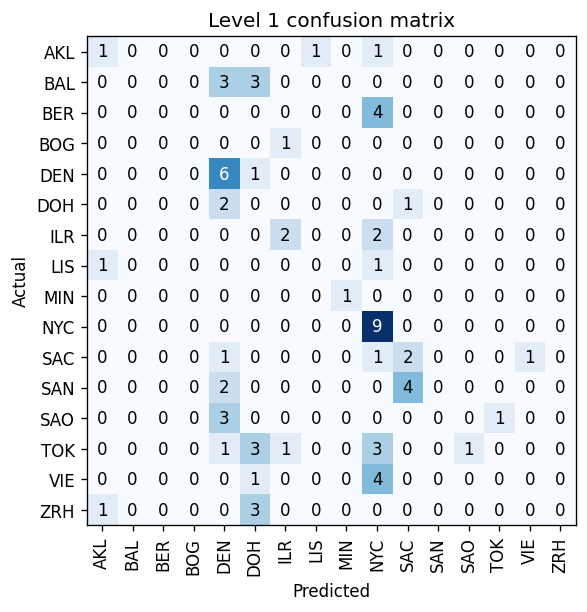

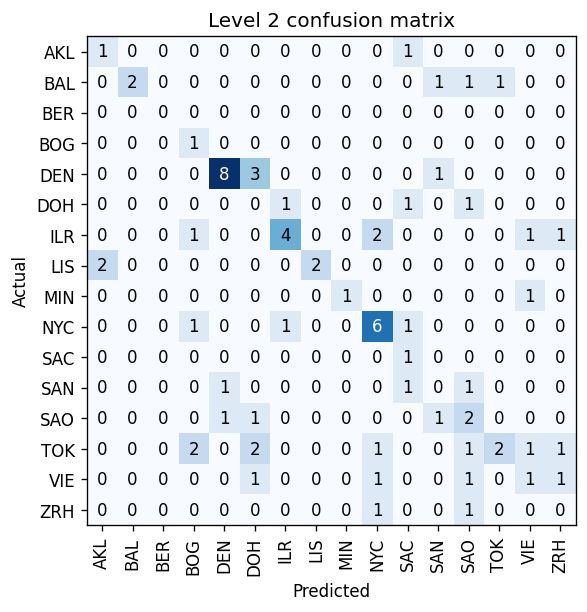

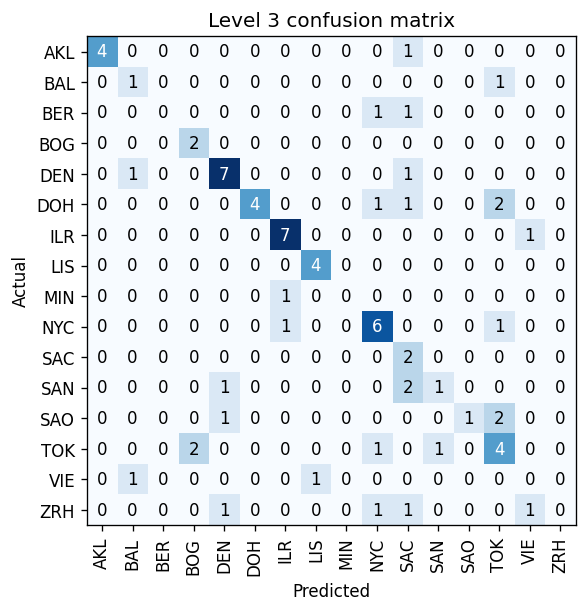

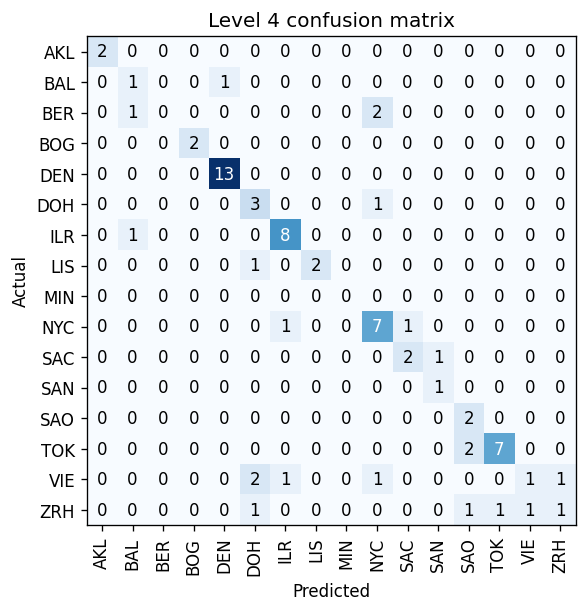

In [27]:
for i, learner in enumerate(learners):
    interp = ft.ClassificationInterpretation.from_learner(learner)
    interp.plot_confusion_matrix(figsize=(5,5), dpi=120, title=f"Level {i+1} confusion matrix")